<a href="https://www.kaggle.com/code/ankumagawa/technologysimilarityanalysis-japanesepharma-firm?scriptVersionId=135928429" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-ratio1/Medical Ratio.csv


### Overview: 

- Research utilizes the patent information (subclass IPC) to understand the similarity in the technology of different pharmaceutical companies;

- Although the companies are all in the same industry, Some companies may be pursuing similar technologies, others are possessing completely different technologies;

- Sample contains number of patent applications are classified in each subclass IPC of 37 japanese pharmaceutical firms in the period 2000 to 2020

- Objective of the IPC: (https://www.wipo.int/edocs/pubdocs/en/wipo-guide-ipc-2022-en-guide-to-the-international-patent-classification-2022.pdf)

- How to search for IPC publication: (https://ipcpub.wipo.int/?notion=scheme&version=20220101&symbol=A23D&menulang=en&lang=en&viewmode=f&fipcpc=no&showdeleted=yes&indexes=no&headings=yes&notes=yes&direction=o2n&initial=A&cwid=none&tree=no&searchmode=smart)


### Research Methodology: 

- Transform the original data 

- Apply Distance Metrics to calculate the similarity between company's technololy.

- Apply Clustering Algorithms to group companies having the same technologies.


# Kernel Layout:

# <a href='#1'>  1) Thereotical and Mathematic Background: </a>

## <a href='#1.1'> 1.1) Minkowski  Distance Metric: </a>

## <a href='#1.2'> 1.2) Eucclidean Distance Metric: </a>

## <a href='#1.3'> 1.3) Manhattan Distance Metric: </a>

## <a href='#1.4'> 1.4) Cosine Distance Metric & Cosine Similarity: </a>

## <a href ='#1.5'> 1.5) Jemsen-Shannon Distance Metric: </a>

# <a href='#2'>  2) CODE IMPLEMENTATION: </a>

## <a href='#2.1'> 2.1) Minkowski  Distance Metric: </a>

## <a href='#2.2'> 2.2) Eucclidean  Distance Metric: </a>

## <a href='#2.3'> 2.3) Mahhatan Distance Metric: <a>
    
## <a href='#2.4'> 2.4) Cosine Distance Metric: </a>
    
## <a href='#2.5'> 2.5) Jemsen-Shannon Distance Metric: </a>
    
# <a href='#3'>  3) COMPANY GROUPING: </a>   
    
## <a href='#3.1'> 3.1) k-mean Cluster: Elbow Method: </a>
    
## <a href='#3.2'> 3.2) k-mean Cluster: Silhouette Method: </a>

## <a href='#3.3'> 3.3) Agglomerative Hierarchical Method: </a>
    
## <a href='#3.4'> 3.4) Company Grouping Summary: </a>

## <a id='1'> <h1><center> 1. THREOTICAL AND MATHEMATIC BACKGROUND:</center></h1> </a>

Distance metrics are a key part of several machine learning algorithms. A distance measure is an objective score that summarizes the relative difference between two objects in a problem domain.


These distance metrics are used in both supervised and unsupervised learning, generally to calculate the similarity between data points.

Let’s say we want to create clusters using the K-Means Clustering or k-Nearest Neighbour algorithm to solve a classification or regression problem. How will you define the similarity between different observations here? How can we say that two points are similar to each other?

We can calculate the distance between points and then define the similarity between them. How do we calculate this distance and what are the different distance metrics in machine learning?


There are several ways of measuring distance between point a and b in d dimensions with closer distance implying similarity.

In this project, I will introduce different approaches to measuring distance. These approachses are:

1) Minkowski Distance Metric
    
    * Mahanttan Distance:
    
    * Euclidean Distance:

2) Weighted Similarity

3) Cosine Similarity

4) Jensen-Shannon

Follow-up section is the code implementation with the case study is 37 pharmarceutical companies and theirs number of patent applied in each IPC. The goal of this section is how to apply different Similarity Measure Algorithm to calculate the Technonoly Similarity between the companies. 

## <a id='1.1'> 1.1) Minkowski Distance Metric: </a>

Minkowski Distance is the generalized form of Euclidean and Manhattan Distance.

The formula for Minkowski Distance is given as:

![](https://cdn-images-1.medium.com/max/1067/1*Fb22fnJRABGUANpjcjwEow.png)

The p parameter of the Minkowski Distance metric represents the order of the norm. 

When p is set to 1, the calculation is the same as the Manhattan distance. When p is set to 2, it is the same as the Euclidean distance.

p=1: Manhattan distance.

p=2: Euclidean distance.

p= infinitive, Chebychev Distance

Intermediate values provide a controlled balance between the two measures.

It is common to use Minkowski distance when implementing a machine learning algorithm that uses distance measures as it gives control over the type of distance measure used for real-valued vectors via a hyperparameter “p” that can be tuned.

## <a id='1.2'> 1.2) Euclidean Distance Metric: </a>

Euclidean Distance represents the shortest distance between two points.

Most machine learning algorithms including K-Means use this distance metric to measure the similarity between observations. Let’s say we have two points as shown below:

![](https://cdn-images-1.medium.com/max/1067/1*p1BaA9Px8PimHUuz1V6DMA.png)

So, the Euclidean Distance between these two points A and B will be:

![](https://cdn-images-1.medium.com/max/1067/1*RwxPrdfS0G0w68yAdw-6Cw.png)

Here’s the formula for Euclidean Distance:

![](https://cdn-images-1.medium.com/max/1067/1*_ftwbnr74RtEwnquHPg2rg.png)

We can generalize this for an n-dimensional space as:

![](https://cdn-images-1.medium.com/max/1067/1*lHQbNP1Grabz0ViiPM9uow.png)

Where,

n = number of dimensions
pi, qi = data points

* ## <a id='1.3'> 1.3) Manhattan Distance Metric: </a>

Manhattan Distance is the sum of absolute differences between points across all the dimensions.

We can represent Manhattan Distance as:

![](https://cdn-images-1.medium.com/max/1067/1*kYsOWlz9d7VFWEBYI8Cudg.png)

Since the above representation is 2 dimensional, to calculate Manhattan Distance, we will take the sum of absolute distances in both the x and y directions. So, the Manhattan distance in a 2-dimensional space is given as:

![](https://cdn-images-1.medium.com/max/1067/1*i3kQozqYjq7fj5IHXPlo5g.png)

And the generalized formula for an n-dimensional space is given as:

![](https://cdn-images-1.medium.com/max/1067/1*9A3Ni7-UQ4NjDQd4e1kXaA.png)

Where,

n = number of dimensions
pi, qi = data points

## <a id='1.4'> 1.4) Cosine Distance & Cosine Similarity Metric: </a>

Cosine distance & Cosine Similarity metric is mainly used to find similarities between two data points. As the cosine distance between the data points increases, the cosine similarity, or the amount of similarity decreases, and vice versa.

![](https://miro.medium.com/max/1236/1*23O5Hck8v5flOF9LtvGr8A.png)

In the above figure, imagine the value of θ to be 60 degrees, then by cosine similarity formula, Cos 60 =0.5 and Cosine distance is 1- 0.5 = 0.5. Therefore the points are 50% similar to each other.

## <a id='1.5'> 1.5) Jensen-Shannon Distance Metric: </a>

The Jensen functions is the right metric for calculating distances between probability distribution

![](https://miro.medium.com/max/1400/1*viATYZeg9SiT-ZdzYGjKYA.png)

## <a id='2'> <h1><center> 2. CODE IMPLEMENTATION:</center></h1> </a>

#  <h1><center>Dataset Overview: </h1></center>



In [2]:
# original data:


In [3]:
 import pandas as pd # Import library
df=pd.read_csv('../input/medical-ratio1/Medical Ratio.csv')
pd.set_option('display.max_columns', None) # display all feature
df=df.drop([38])
df

,COMPANY,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,A23D,A23F,A23G,A23J,A23K,A23L,A23P,A24B,A24F,A41D,A44B,A45B,A45C,A45D,A47C,A47F,A47G,A47K,A47L,A61B,A61C,A61D,A61F,A61G,A61H,A61J,A61K,A61L,A61M,A61N,A61P,A61Q,A62B,A62D,A63B,A63F,B01D,B01F,B01J,B01L,B02C,B03B,B03C,B04B,B04C,B05B,B05C,B05D,B06B,B07B,B07C,B08B,B09B,B21D,B23K,B23P,B24B,B24D,B25H,B25J,B26D,B26F,B27K,B27N,B28B,B29B,B29C,B29D,B29K,B29L,B30B,B31B,B32B,B33Y,B41F,B41J,B41K,B41M,B43K,B43M,B60C,B60J,B60K,B60N,B60R,B63B,B64D,B65B,B65C,B65D,B65G,B65H,B66B,B66F,B67B,B67C,B67D,B81B,B81C,B82Y,C01B,C01D,C01F,C01G,C02F,C03B,C03C,C04B,C05B,C05D,C05G,C06B,C06D,C07B,C07C,C07D,C07H,C07K,C07M,C08B,C08C,C08F,C08G,C08H,C08J,C08K,C08L,C09B,C09C,C09D,C09F,C09J,C09K,C10B,C10G,C10L,C10M,C10N,C11B,C11C,C11D,C12C,C12F,C12G,C12H,C12J,C12M,C12N,C12P,C12Q,C12R,C13B,C22B,C22C,C23C,C23F,C25B,C25D,C25F,C30B,C40B,C01F.1,C02G,C03D,C04B.1,D04C,D04H,D06M,D06P,D21B,D21C,D21H,E01B,E02B,E04B,E04C,E04F,E04H,E06B,E06C,F21B,F01N,F15B,F16B,F16C,F16D,F16F,F16K,F17C,F21S,F21V,F21Y,F23J,F23Q,F24F,F26B,F28D,G01B,G01D,G01F,C01G.1,G01H,G01J,G01M,G01P,G01R,G01V,G02B,G02C,G02F,G03B,G03C,G03F,G03G,G04F,G05B,G05F,G06G,C06K,G06M,G06N,G06Q,C07F,G07G,G08B,C08G.1,G09B,G09F,C09G,G11B,G11C,G16B,G16C,G16H,G21F,G21G,G21K,H01B,H01F,H01G,H01H,H01J,H01L,H01M,H01Q,H01R,H01S,H01T,H02H,H02J,H02K,H02M,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,ASKA PHARMA HOLDINGS,0.000000,0.000000,0.000000,0.000000,0.000756,0.006803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003023,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001512,0.000000,0.000000,0.348450,0.002268,0.000756,0.000000,0.629630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ASTELLAS PHARMA INC,0.000000,0.000000,0.000000,0.002385,0.000000,0.003634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [4]:
df.shape

(38, 273)

 The dataset contain 38 observations corresponds to 37 Pharmaceutical Companies and the Ratio Rows here represents the Ratio: **hypothetical proportion (average) firm**  called benchmark company
 

273 feature corresponds to 273 sub-IPC (International Patent Classification)

Each sub-IPC represents different technology 

Our goal is to define the list of the companies having the same technology to the Ratio. In other words, we calcuate the distance of the sub-IPC of the companies to the Ratio using different Distance Metric. 

The smaller distance of a company to the Ratio, The higher similarity of that company to the Domain Technology.


In [5]:
df1=df.copy()
df1= df1.drop(columns='COMPANY')
df1

,A01C,A01G,A01H,A01K,A01M,A01N,A01P,A21D,A23B,A23C,A23D,A23F,A23G,A23J,A23K,A23L,A23P,A24B,A24F,A41D,A44B,A45B,A45C,A45D,A47C,A47F,A47G,A47K,A47L,A61B,A61C,A61D,A61F,A61G,A61H,A61J,A61K,A61L,A61M,A61N,A61P,A61Q,A62B,A62D,A63B,A63F,B01D,B01F,B01J,B01L,B02C,B03B,B03C,B04B,B04C,B05B,B05C,B05D,B06B,B07B,B07C,B08B,B09B,B21D,B23K,B23P,B24B,B24D,B25H,B25J,B26D,B26F,B27K,B27N,B28B,B29B,B29C,B29D,B29K,B29L,B30B,B31B,B32B,B33Y,B41F,B41J,B41K,B41M,B43K,B43M,B60C,B60J,B60K,B60N,B60R,B63B,B64D,B65B,B65C,B65D,B65G,B65H,B66B,B66F,B67B,B67C,B67D,B81B,B81C,B82Y,C01B,C01D,C01F,C01G,C02F,C03B,C03C,C04B,C05B,C05D,C05G,C06B,C06D,C07B,C07C,C07D,C07H,C07K,C07M,C08B,C08C,C08F,C08G,C08H,C08J,C08K,C08L,C09B,C09C,C09D,C09F,C09J,C09K,C10B,C10G,C10L,C10M,C10N,C11B,C11C,C11D,C12C,C12F,C12G,C12H,C12J,C12M,C12N,C12P,C12Q,C12R,C13B,C22B,C22C,C23C,C23F,C25B,C25D,C25F,C30B,C40B,C01F.1,C02G,C03D,C04B.1,D04C,D04H,D06M,D06P,D21B,D21C,D21H,E01B,E02B,E04B,E04C,E04F,E04H,E06B,E06C,F21B,F01N,F15B,F16B,F16C,F16D,F16F,F16K,F17C,F21S,F21V,F21Y,F23J,F23Q,F24F,F26B,F28D,G01B,G01D,G01F,C01G.1,G01H,G01J,G01M,G01P,G01R,G01V,G02B,G02C,G02F,G03B,G03C,G03F,G03G,G04F,G05B,G05F,G06G,C06K,G06M,G06N,G06Q,C07F,G07G,G08B,C08G.1,G09B,G09F,C09G,G11B,G11C,G16B,G16C,G16H,G21F,G21G,G21K,H01B,H01F,H01G,H01H,H01J,H01L,H01M,H01Q,H01R,H01S,H01T,H02H,H02J,H02K,H02M,H02N,H03L,H03M,H04B,H04L,H04N,H04R,H04W,H05B,H05K
0,0.000000,0.000000,0.000000,0.000000,0.000756,0.006803,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003023,0.001512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001512,0.000000,0.000000,0.348450,0.002268,0.000756,0.000000,0.629630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.002385,0.000000,0.003634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000114,0.000454,0.000000,0.000000,0.000000,0.000000

## <a id='i=2.1'> 2.1) Minkowski Distance Metric: </a>

In [6]:
from scipy.spatial.distance import cdist
m_dist=pd.DataFrame(cdist(df1,df1,metric='minkowski', p=3))
#diplay the Minkowski Distance:
m_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.242261,0.237749,0.180069,0.176319,0.140228,0.358729,0.659834,0.231757,0.544384,0.275366,0.497210,0.329338,0.139077,0.143893,0.049505,0.179225,0.211596,0.416380,0.151159,0.121639,0.133577,0.011631,0.379545,0.617937,0.447212,0.286508,0.483895,0.219782,0.230639,0.387420,0.259279,0.276530,0.150436,0.509625,0.377872,0.385934,0.250223
1,0.242261,0.000000,0.062795,0.095677,0.066764,0.103500,0.165448,0.609663,0.032979,0.319174,0.188701,0.261718,0.113537,0.134926,0.098528,0.193022,0.102269,0.052752,0.174343,0.093076,0.132295,0.283329,0.232315,0.182247,0.629701,0.209036,0.063396,0.241891,0.204829,0.020408,0.404455,0.031521,0.049277,0.351517,0.267400,0.171001,0.145280,0.079958
2,0.237749,0.062795,0.000000,0.064219,0.078021,0.104922,0.136590,0.564931,0.037338,0.311070,0.141354,0.264053,0.102303,0.105761,0.109163,0.192764,0.061921,0.042755,0.207310,0.109924,0.116316,0.234682,0.229901,0.153385,0.609518,0.218856,0.063522,0.271938,0.161665,0.049286,0.350671,0.056499,0.062488,0.315411,0.293769,0.146104,0.165616,0.037494
3,0.180069,0.095677,0.064219,0.000000,0.042147,0.051557,0.186429,0.569528,0.066204,0.367467,0.135744,0.321822,0.153144,0.047412,0.057862,0.136251,0.032312,0.046272,0.258558,0.060944,0.060443,0.188740,0.172571,0.204688,0.590867,0.276001,0.113245,0.324851,0.134458,0.075839,0.327583,0.100289,0.107154,0.261574,0.347873,0.199671,0.219994,0.071584
4,0.176319,0.066764,0.078021,0.042147,0.000000,0.036915,0.208291,0.602779,0.059370,0.375688,0.166781,0.322981,0.162860,0.075424,0.034692,0.127468,0.050895,0.044289,0.240934,0.033633,0.067481,0.225390,0.166691,0.227850,0.611688,0.271727,0.115401,0.308504,0.162853,0.054662,0.367031,0.083875,0.102955,0.287957,0.333789,0.219677,0.209743,0.094540
5,0.140228,0.103500,0.104922,0.051557,0.036915,0.000000,0.234903,0.604176,0.092339,0.408201,0.173073,0.357650,0.193817,0.048020,0.015174,0.091955,0.054435,0.073654,0.277654,0.025453,0.035559,0.194950,0.130908,0.255272,0.608093,0.307222,0.148118,0.345220,0.150797,0.090513,0.353814,0.119327,0.136987,0.253917,0.370436,0.248321,0.245839,0.121808
6,0.358729,0.165448,0.136590,0.186429,0.208291,0.234903,0.000000,0.523980,0.153446,0.234120,0.155177,0.214058,0.107288,0.222879,0.239959,0.318117,0.184415,0.167519,0.208670,0.240697,0.241367,0.291940,0.352443,0.076184,0.605637,0.194648,0.117780,0.262228,0.186353,0.163213,0.334175,0.142363,0.126609,0.393535,0.276397,0.087004,0.163954,0.121114
7,0.659834,0.609663,0.564931,0.569528,0.602779,0.604176,0.523980,0.000000,0.586935,0.655966,0.449094,0.665206,0.574946,0.578963,0.614128,0.639548,0.568658,0.583489,0.680899,0.619936,0.595866,0.535668,0.657649,0.495883,0.636937,0.657904,0.575926,0.722433,0.512044,0.596928,0.390900,0.601763,0.592440,0.636098,0.732565,0.545371,0.644564,0.540648
8,0.231757,0.032979,0.037338,0.066204,0.059370,0.092339,0.153446,0.586935,0.000000,0.318274,0.161602,0.265592,0.107571,0.109224,0.093726,0.184101,0.071955,0.026610,0.193371,0.092531,0.113323,0.253099,0.222820,0.170726,0.616797,0.216418,0.058536,0.260171,0.177871,0.015543,0.373223,0.035514,0.046703,0.326413,0.283920,0.162356,0.156764,0.050683
9,0.544384,0.319174,0.311070,0.367467,0.375688,0.408201,0.234120,0.655966,0.318274,0.000000,0.350968,0.121787,0.226309,0.410505,0.409628,0.498430,0.369373,0.336622,0.186401,0.407364,0.424275,0.508686,0.536198,0.227078,0.693411,0.146628,0.265411,0.151371,0.395973,0.323501,0.526974,0.297260,0.276519,0.605511,0.141211,0.198803,0.192259,0.303186


In [7]:
# Distance of Compaines to Ratio
np.warnings.filterwarnings('ignore')
Minkowski= m_dist.iloc[37:38, :] 
Minkowski.columns=df['COMPANY']
pd.set_option('display.max_columns', None)
Minkowski.rename(index={37:'Minkowski'},inplace =True)
Minkowski

COMPANY,ASKA PHARMA HOLDINGS,ASTELLAS PHARMA INC,BIOFERMIN PHARMA,CHUGAI PHARMA,DAIICHI SANKYO CO LTD,DAINIPPON SUMITOMO,DAITO PHARMA,EIKEN CHEMICAL CO LTD,EISAI CO LTD,FUJI PHARMA,FUSO PHARMA,HISAMITSU PHARMA,JCR PHARMA,KAKEN PHARMA,KISSEI PHARMA,KYORIN HOLDINGS INC,KYOWA KIRIN CO LTD,MOCHIDA PHARMA,NICHI-IKO PHARMA,NIPPON CHEMIPHAR,NIPPON SHINYAKU,NISSUI PHARMA,ONO PHARMA,OTSUKA HOLDINGS,PEPTIDREAM INC,ROHTO PHARMA,SANTEN PHARMA,SAWAI GROUP HOLDINGS,SEIKAGAKU CORP,SHIONOGI & CO LTD,TAIKO PHARMA,TAISHO PHARMA,TAKEDA PHARMA CO LTD,TORII PHARMA,TOWA PHARMA,TSUMURA & CO,ZERIA PHARMA,RATIO
Minkowski,0.250223,0.079958,0.037494,0.071584,0.09454,0.121808,0.121114,0.540648,0.050683,0.303186,0.119912,0.262577,0.097403,0.112497,0.127284,0.207362,0.073017,0.05413,0.220197,0.127816,0.130302,0.222786,0.243158,0.133856,0.588157,0.223268,0.071767,0.282582,0.145852,0.063787,0.32856,0.07622,0.074049,0.311139,0.302607,0.129671,0.176409,0.0


In [8]:
# Top 10 companies with Highest Technology Similarity to the Domain Technology:
Minkowski_report = Minkowski.transpose()
Minkowski_report.reset_index()
Minkowski_report = Minkowski_report.sort_values(by='Minkowski',ascending= True).head(11)
Minkowski_report

,Minkowski
COMPANY,
RATIO,0.000000
BIOFERMIN PHARMA,0.037494
EISAI CO LTD,0.050683
MOCHIDA PHARMA,0.054130
SHIONOGI & CO LTD,0.063787
CHUGAI PHARMA,0.071584
SANTEN PHARMA,0.071767
KYOWA KIRIN CO LTD,0.073017
TAKEDA PHARMA CO LTD,0.074049


## <a href='#2.2'> 2.2) Eucclidean Distance Metric: </a>


In [9]:
from scipy.spatial.distance import cdist
e_dist=pd.DataFrame(cdist(df1,df1,metric='euclidean'))
#diplay the Minkowski Distance:
e_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.272009,0.263204,0.196011,0.197795,0.157207,0.387201,0.798273,0.258023,0.607379,0.295855,0.553585,0.366290,0.150748,0.161728,0.056303,0.195140,0.235497,0.467714,0.169782,0.134989,0.166040,0.014038,0.398307,0.697964,0.501209,0.319483,0.543331,0.242277,0.258318,0.457852,0.291244,0.308550,0.170034,0.572176,0.407001,0.432803,0.269106
1,0.272009,0.000000,0.077039,0.100655,0.075358,0.116606,0.197775,0.763303,0.036376,0.354045,0.219845,0.287343,0.124880,0.148695,0.110996,0.216623,0.109603,0.057869,0.196588,0.103907,0.148726,0.303602,0.260604,0.200208,0.707976,0.234196,0.069300,0.271867,0.227588,0.021895,0.464682,0.037167,0.054282,0.391770,0.300645,0.182769,0.163574,0.091445
2,0.263204,0.077039,0.000000,0.083086,0.087988,0.116699,0.161045,0.716151,0.051379,0.359624,0.174432,0.302144,0.129348,0.130827,0.117823,0.211812,0.074207,0.055955,0.230693,0.118496,0.130461,0.262851,0.253526,0.163716,0.675685,0.249895,0.083417,0.303127,0.190063,0.064361,0.414393,0.061994,0.080018,0.363859,0.329495,0.162236,0.186160,0.054280
3,0.196011,0.100655,0.083086,0.000000,0.049979,0.056884,0.210960,0.721185,0.075026,0.419663,0.169598,0.363093,0.178636,0.061654,0.064992,0.145138,0.038931,0.055577,0.287282,0.070555,0.071294,0.208895,0.186299,0.213704,0.656641,0.313970,0.131799,0.361838,0.158115,0.081397,0.398610,0.113489,0.122994,0.300876,0.389074,0.218007,0.248396,0.077706
4,0.197795,0.075358,0.087988,0.049979,0.000000,0.042659,0.229105,0.758978,0.064243,0.419412,0.206274,0.358144,0.180319,0.083370,0.038943,0.142506,0.061017,0.049237,0.270883,0.035088,0.076190,0.240725,0.186484,0.235854,0.688442,0.305057,0.127958,0.346341,0.192359,0.061483,0.440348,0.096316,0.114428,0.321019,0.374967,0.229353,0.235994,0.100020
5,0.157207,0.116606,0.116699,0.056884,0.042659,0.000000,0.254695,0.758700,0.102575,0.456614,0.209349,0.397711,0.215896,0.058731,0.019358,0.102535,0.062855,0.081996,0.312159,0.027602,0.042204,0.209503,0.146131,0.262381,0.684143,0.345501,0.165637,0.387657,0.182746,0.102396,0.431837,0.135935,0.153433,0.283417,0.416246,0.262227,0.276634,0.125842
6,0.387201,0.197775,0.161045,0.210960,0.229105,0.254695,0.000000,0.666547,0.179380,0.292588,0.209170,0.251595,0.149138,0.251512,0.257767,0.341350,0.204923,0.192103,0.228142,0.259402,0.261687,0.344477,0.379216,0.104958,0.666877,0.223256,0.157028,0.281182,0.240257,0.191164,0.383233,0.172846,0.163409,0.457278,0.297589,0.119826,0.184230,0.149045
7,0.798273,0.763303,0.716151,0.721185,0.758978,0.758700,0.666547,0.000000,0.739722,0.764643,0.580600,0.773745,0.714149,0.730534,0.770641,0.785870,0.721338,0.737804,0.809308,0.777506,0.748044,0.649301,0.798007,0.622805,0.772296,0.777248,0.718515,0.837746,0.662171,0.750138,0.524249,0.753922,0.741461,0.754940,0.842801,0.679181,0.777559,0.685486
8,0.258023,0.036376,0.051379,0.075026,0.064243,0.102575,0.179380,0.739722,0.000000,0.360213,0.192127,0.296956,0.123991,0.125800,0.100736,0.203717,0.081580,0.034878,0.215950,0.097453,0.129049,0.276460,0.247276,0.181859,0.688310,0.246392,0.068483,0.290809,0.201090,0.020515,0.434106,0.042914,0.057288,0.369172,0.318474,0.172562,0.177343,0.061873
9,0.607379,0.354045,0.359624,0.419663,0.419412,0.456614,0.292588,0.764643,0.360213,0.000000,0.415637,0.142149,0.271730,0.468665,0.455162,0.555017,0.422679,0.382240,0.210380,0.450584,0.479020,0.585331,0.597279,0.271160,0.798978,0.173498,0.305020,0.182258,0.469738,0.362463,0.585620,0.334010,0.315602,0.693888,0.172524,0.247554,0.218277,0.352849


In [10]:
# Distance of Compaines to Ratio
np.warnings.filterwarnings('ignore')
Euclidean= e_dist.iloc[37:38, :] 
Euclidean.columns=df['COMPANY']
pd.set_option('display.max_columns', None)
Euclidean.rename(index={37:'Euclidean'},inplace =True)
Euclidean

COMPANY,ASKA PHARMA HOLDINGS,ASTELLAS PHARMA INC,BIOFERMIN PHARMA,CHUGAI PHARMA,DAIICHI SANKYO CO LTD,DAINIPPON SUMITOMO,DAITO PHARMA,EIKEN CHEMICAL CO LTD,EISAI CO LTD,FUJI PHARMA,FUSO PHARMA,HISAMITSU PHARMA,JCR PHARMA,KAKEN PHARMA,KISSEI PHARMA,KYORIN HOLDINGS INC,KYOWA KIRIN CO LTD,MOCHIDA PHARMA,NICHI-IKO PHARMA,NIPPON CHEMIPHAR,NIPPON SHINYAKU,NISSUI PHARMA,ONO PHARMA,OTSUKA HOLDINGS,PEPTIDREAM INC,ROHTO PHARMA,SANTEN PHARMA,SAWAI GROUP HOLDINGS,SEIKAGAKU CORP,SHIONOGI & CO LTD,TAIKO PHARMA,TAISHO PHARMA,TAKEDA PHARMA CO LTD,TORII PHARMA,TOWA PHARMA,TSUMURA & CO,ZERIA PHARMA,RATIO
Euclidean,0.269106,0.091445,0.05428,0.077706,0.10002,0.125842,0.149045,0.685486,0.061873,0.352849,0.144592,0.297575,0.118149,0.12815,0.131142,0.219003,0.084523,0.064811,0.236186,0.132432,0.140185,0.251465,0.259803,0.140986,0.647546,0.252672,0.078661,0.307613,0.170707,0.075617,0.384079,0.085058,0.081015,0.35863,0.33259,0.148475,0.193025,0.0


In [11]:
# Top 10 companies with Highest Technology Similarity to the Domain Technology:
Euclidean_report = Euclidean.transpose()
Euclidean_report.reset_index()
Euclidean_report= Euclidean_report.sort_values(by='Euclidean',ascending= True).head(11)
Euclidean_report

,Euclidean
COMPANY,
RATIO,0.000000
BIOFERMIN PHARMA,0.054280
EISAI CO LTD,0.061873
MOCHIDA PHARMA,0.064811
SHIONOGI & CO LTD,0.075617
CHUGAI PHARMA,0.077706
SANTEN PHARMA,0.078661
TAKEDA PHARMA CO LTD,0.081015
KYOWA KIRIN CO LTD,0.084523


## <a id='2.3'> 2.3) Mahattan Distance Metric: </a>

In [12]:
from scipy.spatial.distance import cdist
m_dist=pd.DataFrame(cdist(df1,df1,metric='cityblock'))
#diplay the Minkowski Distance:
m_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.423904,0.481529,0.363659,0.327167,0.272253,0.732253,1.818182,0.433029,1.050076,0.570417,0.927736,0.648831,0.291856,0.256992,0.114574,0.361170,0.403406,0.713269,0.266414,0.261169,0.432351,0.043764,0.767552,1.142857,0.811953,0.542611,0.818383,0.448852,0.416975,1.144613,0.481157,0.524344,0.345427,0.865738,0.757084,0.687475,0.503971
1,0.423904,0.000000,0.203727,0.206051,0.143851,0.212807,0.495803,1.794332,0.099691,0.663118,0.519755,0.526301,0.247860,0.304389,0.196961,0.340422,0.226968,0.130176,0.338733,0.180222,0.284395,0.597576,0.396211,0.505109,1.142630,0.414626,0.149640,0.437941,0.423176,0.059433,1.124969,0.090847,0.133558,0.721649,0.487253,0.409891,0.314606,0.247517
2,0.481529,0.203727,0.000000,0.271988,0.208381,0.271610,0.433107,1.786932,0.189190,0.751603,0.503064,0.643350,0.351779,0.374008,0.247429,0.403893,0.206652,0.175362,0.445056,0.237431,0.281086,0.574830,0.464421,0.458394,1.142857,0.486881,0.268108,0.548217,0.455719,0.194627,1.137668,0.143141,0.259094,0.758929,0.604444,0.455268,0.371499,0.240111
3,0.363659,0.206051,0.271988,0.000000,0.147830,0.160751,0.523593,1.773841,0.195440,0.853073,0.472081,0.693065,0.399431,0.212179,0.178545,0.278967,0.150571,0.172667,0.514242,0.186933,0.214186,0.494281,0.337115,0.495748,1.118742,0.592835,0.309059,0.605822,0.390251,0.182813,1.078837,0.272478,0.288537,0.658737,0.657533,0.511493,0.487061,0.213110
4,0.327167,0.143851,0.208381,0.147830,0.000000,0.102753,0.492471,1.803683,0.142395,0.784591,0.527131,0.636830,0.364780,0.198062,0.095939,0.230924,0.169426,0.122801,0.444131,0.077336,0.165633,0.502009,0.293413,0.503609,1.136711,0.522598,0.262467,0.534274,0.425420,0.128820,1.132904,0.192181,0.235808,0.615082,0.584879,0.461166,0.408015,0.237997
5,0.272253,0.212807,0.271610,0.160751,0.102753,0.000000,0.537838,1.792428,0.206898,0.841507,0.514284,0.698214,0.421799,0.174303,0.066520,0.182973,0.177237,0.182259,0.510443,0.066610,0.118595,0.451440,0.243447,0.519316,1.140391,0.587527,0.317255,0.609530,0.416808,0.203552,1.137142,0.258289,0.299071,0.552933,0.659156,0.533224,0.477972,0.267967
6,0.732253,0.495803,0.433107,0.523593,0.492471,0.537838,0.000000,1.818182,0.465810,0.791010,0.695783,0.687852,0.498119,0.610179,0.495346,0.662723,0.497362,0.465286,0.465346,0.500476,0.554090,0.833538,0.717680,0.452937,1.160069,0.561742,0.485963,0.558058,0.697060,0.478668,1.043783,0.446439,0.489583,1.037620,0.602338,0.447915,0.434596,0.465994
7,1.818182,1.794332,1.786932,1.773841,1.803683,1.792428,1.818182,0.000000,1.789389,1.741259,1.552882,1.763164,1.739130,1.804293,1.814295,1.809439,1.799729,1.804346,1.811402,1.816795,1.807667,1.593692,1.814528,1.673832,1.818182,1.786288,1.723546,1.805081,1.760562,1.786681,1.720199,1.802541,1.784479,1.777572,1.803411,1.782397,1.811879,1.722845
8,0.433029,0.099691,0.189190,0.195440,0.142395,0.206898,0.465810,1.789389,0.000000,0.715140,0.472827,0.553016,0.297830,0.298462,0.192084,0.349475,0.208141,0.121549,0.395535,0.189694,0.265258,0.588904,0.408584,0.446365,1.140954,0.462671,0.169826,0.491286,0.406203,0.078012,1.110382,0.129319,0.173330,0.727351,0.536286,0.384001,0.346895,0.199519
9,1.050076,0.663118,0.751603,0.853073,0.784591,0.841507,0.791010,1.741259,0.715140,0.000000,0.971342,0.388436,0.643281,0.938492,0.810577,0.969126,0.855936,0.763067,0.423077,0.799931,0.901116,1.182104,1.029434,0.762577,1.464286,0.398442,0.643069,0.423077,1.034306,0.699157,1.417590,0.652099,0.677250,1.341837,0.420123,0.704274,0.472366,0.762035


In [13]:
# Distance of Compaines to Ratio
np.warnings.filterwarnings('ignore')
Mahattan= m_dist.iloc[37:38, :] 
Mahattan.columns=df['COMPANY']
pd.set_option('display.max_columns', None)
Mahattan.rename(index={37:'Mahattan'},inplace =True)
Mahattan

COMPANY,ASKA PHARMA HOLDINGS,ASTELLAS PHARMA INC,BIOFERMIN PHARMA,CHUGAI PHARMA,DAIICHI SANKYO CO LTD,DAINIPPON SUMITOMO,DAITO PHARMA,EIKEN CHEMICAL CO LTD,EISAI CO LTD,FUJI PHARMA,FUSO PHARMA,HISAMITSU PHARMA,JCR PHARMA,KAKEN PHARMA,KISSEI PHARMA,KYORIN HOLDINGS INC,KYOWA KIRIN CO LTD,MOCHIDA PHARMA,NICHI-IKO PHARMA,NIPPON CHEMIPHAR,NIPPON SHINYAKU,NISSUI PHARMA,ONO PHARMA,OTSUKA HOLDINGS,PEPTIDREAM INC,ROHTO PHARMA,SANTEN PHARMA,SAWAI GROUP HOLDINGS,SEIKAGAKU CORP,SHIONOGI & CO LTD,TAIKO PHARMA,TAISHO PHARMA,TAKEDA PHARMA CO LTD,TORII PHARMA,TOWA PHARMA,TSUMURA & CO,ZERIA PHARMA,RATIO
Mahattan,0.503971,0.247517,0.240111,0.21311,0.237997,0.267967,0.465994,1.722845,0.199519,0.762035,0.422754,0.59952,0.321094,0.34465,0.26655,0.421888,0.263893,0.213587,0.462102,0.283941,0.320444,0.567999,0.480012,0.365514,1.10901,0.516326,0.220144,0.562041,0.421285,0.221603,1.042537,0.243636,0.23484,0.775123,0.607597,0.443733,0.407708,0.0


In [14]:
# Top 10 companies with Highest Technology Similarity to the Domain Technology:
Mahattan_report = Mahattan.transpose()
Mahattan_report.reset_index()
Mahattan_report= Mahattan_report.sort_values(by='Mahattan',ascending= True).head(11)
Mahattan_report

,Mahattan
COMPANY,
RATIO,0.000000
EISAI CO LTD,0.199519
CHUGAI PHARMA,0.213110
MOCHIDA PHARMA,0.213587
SANTEN PHARMA,0.220144
SHIONOGI & CO LTD,0.221603
TAKEDA PHARMA CO LTD,0.234840
DAIICHI SANKYO CO LTD,0.237997
BIOFERMIN PHARMA,0.240111


  ## <a id='2.4'> 2.4) Cosine Distance Metric: </a>

In [15]:
from scipy.spatial.distance import cdist
co_dist=pd.DataFrame(cdist(df1,df1,metric='cosine'))
#diplay the Minkowski Distance:
co_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.073740,6.753885e-02,0.034233,3.832765e-02,0.023539,0.153821,0.868043,6.624604e-02,3.724067e-01,0.065265,0.304074,1.390178e-01,0.017765,0.025467,0.002975,3.333643e-02,0.054265,0.206116,0.028226,0.015638,0.011396,0.000190,1.613392e-01,0.512513,0.248206,0.103923,2.646992e-01,4.091805e-02,0.066639,0.163653,0.085316,9.651424e-02,0.026782,0.291294,0.174999,0.185916,0.067641
1,0.073740,0.000000,3.098855e-03,0.008529,6.011577e-03,0.014504,0.028589,0.847632,4.547253e-04,1.329346e-01,0.030141,0.085768,1.454640e-02,0.022608,0.012964,0.047793,1.027332e-02,0.002420,0.035786,0.011096,0.023621,0.101732,0.067487,2.222089e-02,0.555963,0.056587,0.003721,6.369904e-02,4.609399e-02,0.000271,0.226602,0.001278,2.288749e-03,0.168185,0.077923,0.027137,0.027752,0.001406
2,0.067539,0.003099,1.110223e-16,0.008589,6.302265e-03,0.013270,0.029124,0.843218,2.320453e-03,1.459391e-01,0.029012,0.098172,2.096866e-02,0.021105,0.011716,0.043508,6.917637e-03,0.003179,0.045166,0.010564,0.019176,0.090937,0.061828,2.582077e-02,0.552667,0.064662,0.008096,7.507491e-02,4.412208e-02,0.002820,0.222968,0.002360,6.822805e-03,0.157746,0.090141,0.032436,0.034097,0.002862
3,0.034233,0.008529,8.588671e-03,0.000000,7.232930e-04,0.001653,0.054048,0.845621,6.184604e-03,1.990484e-01,0.024574,0.143782,3.967624e-02,0.004649,0.001306,0.017563,1.870553e-03,0.003355,0.077275,0.001048,0.005192,0.055327,0.030015,5.194025e-02,0.517908,0.105431,0.020865,1.158870e-01,2.702517e-02,0.006184,0.187977,0.013399,1.751926e-02,0.106968,0.134438,0.060258,0.065069,0.006465
4,0.038328,0.006012,6.302265e-03,0.000723,1.110223e-16,0.001977,0.049557,0.853937,4.101485e-03,1.888364e-01,0.026196,0.134707,3.541994e-02,0.006279,0.001459,0.020245,1.751712e-03,0.001985,0.070072,0.000862,0.006156,0.062035,0.033786,4.753206e-02,0.532785,0.097038,0.017577,1.072367e-01,2.995663e-02,0.004097,0.196185,0.010122,1.417371e-02,0.114508,0.125235,0.054207,0.058356,0.005112
5,0.023539,0.014504,1.326975e-02,0.001653,1.977405e-03,0.000000,0.066280,0.854690,1.132033e-02,2.240599e-01,0.028337,0.166366,5.196292e-02,0.002314,0.000222,0.010016,2.098434e-03,0.006886,0.094166,0.000337,0.001705,0.044565,0.020017,6.617002e-02,0.526744,0.124737,0.030225,1.363298e-01,2.545918e-02,0.011470,0.182470,0.020226,2.594363e-02,0.089301,0.156367,0.075060,0.080393,0.012395
6,0.153821,0.028589,2.912372e-02,0.054048,4.955743e-02,0.066280,0.000000,0.861300,3.003166e-02,8.994239e-02,0.073414,0.054923,2.314818e-02,0.078972,0.062765,0.118654,5.165075e-02,0.037858,0.023672,0.060206,0.077689,0.180944,0.145745,1.772328e-02,0.597815,0.036297,0.022231,3.949470e-02,9.287423e-02,0.030813,0.273282,0.021531,2.235460e-02,0.269452,0.047621,0.021541,0.017519,0.029942
7,0.868043,0.847632,8.432179e-01,0.845621,8.539374e-01,0.854690,0.861300,0.000000,8.492956e-01,8.528857e-01,0.699299,0.849071,8.328188e-01,0.860021,0.858355,0.861438,8.535732e-01,0.852645,0.861085,0.858930,0.859798,0.761169,0.865996,7.900607e-01,0.936772,0.851493,0.813263,8.646880e-01,8.430037e-01,0.845264,0.799603,0.852571,8.524890e-01,0.878912,0.866115,0.850132,0.860324,0.820049
8,0.066246,0.000455,2.320453e-03,0.006185,4.101485e-03,0.011320,0.030032,0.849296,1.110223e-16,1.429889e-01,0.027936,0.094036,1.779452e-02,0.018480,0.009917,0.041828,7.241512e-03,0.001399,0.041666,0.008420,0.019116,0.092732,0.060352,2.524401e-02,0.550826,0.063557,0.005422,7.140671e-02,4.203499e-02,0.000219,0.218062,0.001790,3.798910e-03,0.156880,0.086312,0.031062,0.032414,0.001066
9,0.372407,0.132935,1.459391e-01,0.199048,1.888364e-01,0.224060,0.089942,0.852886,1.429889e-01,1.110223e-16,0.203683,0.020879,8.175243e-02,0.247697,0.218525,0.316620,2.027231e-01,0.161857,0.041295,0.211509,0.251927,0.413746,0.359694,6.840985e-02,0.709484,0.030961,0.102948,2.505372e-02,2.665529e-01,0.142253,0.478627,0.120610,1.094861e-01,0.530004,0.020785,0.062573,0.049566,0.142131


In [16]:
# Distance of Compaines to Ratio
np.warnings.filterwarnings('ignore')
Cosine= co_dist.iloc[37:38, :] 
Cosine.columns=df['COMPANY']
pd.set_option('display.max_columns', None)
Cosine.rename(index={37:'Cosine'},inplace =True)
Cosine

COMPANY,ASKA PHARMA HOLDINGS,ASTELLAS PHARMA INC,BIOFERMIN PHARMA,CHUGAI PHARMA,DAIICHI SANKYO CO LTD,DAINIPPON SUMITOMO,DAITO PHARMA,EIKEN CHEMICAL CO LTD,EISAI CO LTD,FUJI PHARMA,FUSO PHARMA,HISAMITSU PHARMA,JCR PHARMA,KAKEN PHARMA,KISSEI PHARMA,KYORIN HOLDINGS INC,KYOWA KIRIN CO LTD,MOCHIDA PHARMA,NICHI-IKO PHARMA,NIPPON CHEMIPHAR,NIPPON SHINYAKU,NISSUI PHARMA,ONO PHARMA,OTSUKA HOLDINGS,PEPTIDREAM INC,ROHTO PHARMA,SANTEN PHARMA,SAWAI GROUP HOLDINGS,SEIKAGAKU CORP,SHIONOGI & CO LTD,TAIKO PHARMA,TAISHO PHARMA,TAKEDA PHARMA CO LTD,TORII PHARMA,TOWA PHARMA,TSUMURA & CO,ZERIA PHARMA,RATIO
Cosine,0.067641,0.001406,0.002862,0.006465,0.005112,0.012395,0.029942,0.820049,0.001066,0.142131,0.023402,0.093966,0.017084,0.019469,0.011254,0.043167,0.008272,0.002095,0.042601,0.009737,0.020162,0.089246,0.061718,0.023452,0.528265,0.063633,0.005176,0.072344,0.040505,0.001061,0.209722,0.002753,0.004439,0.157148,0.087092,0.030821,0.033335,0.0


In [17]:
# Top 10 companies with Highest Technology Similarity to the Domain Technology:
Cosine_report = Cosine.transpose()
Cosine_report.reset_index()
Cosine_report =Cosine_report.sort_values(by='Cosine',ascending= True).head(11)
Cosine_report

,Cosine
COMPANY,
RATIO,0.000000
SHIONOGI & CO LTD,0.001061
EISAI CO LTD,0.001066
ASTELLAS PHARMA INC,0.001406
MOCHIDA PHARMA,0.002095
TAISHO PHARMA,0.002753
BIOFERMIN PHARMA,0.002862
TAKEDA PHARMA CO LTD,0.004439
DAIICHI SANKYO CO LTD,0.005112


  ## <a id='2.5'> 2.5) Jensenshannon Distance Metric: </a>

In [18]:
from scipy.spatial.distance import cdist
j_dist=pd.DataFrame(cdist(df1,df1,metric='jensenshannon'))
#diplay the Minkowski Distance:
j_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.176707,0.240561,0.201697,0.158454,0.145687,0.353941,0.735567,0.198856,0.442472,0.339372,0.374738,0.291492,0.181660,0.123742,0.109079,0.200241,0.191587,0.274980,0.126912,0.171627,0.287836,0.091085,0.367402,0.510817,0.324837,0.243203,0.310401,0.295005,0.185850,0.499842,0.210094,0.233125,0.274400,0.329365,0.350384,0.273078,0.256419
1,0.176707,0.000000,0.197953,0.152161,0.099009,0.119886,0.317183,0.714975,0.117892,0.351802,0.293052,0.260488,0.205662,0.190952,0.119165,0.142706,0.175656,0.135247,0.175570,0.115427,0.172629,0.308800,0.156255,0.287006,0.526308,0.216031,0.140761,0.193705,0.280196,0.091788,0.499473,0.136432,0.154086,0.333039,0.212705,0.274275,0.185315,0.186552
2,0.240561,0.197953,0.000000,0.242669,0.199823,0.207611,0.318628,0.712645,0.205637,0.371850,0.317960,0.321280,0.271373,0.273568,0.197561,0.229499,0.174179,0.199783,0.245264,0.207828,0.185010,0.304373,0.240516,0.309125,0.539455,0.232996,0.229580,0.264099,0.323688,0.204326,0.528052,0.147340,0.245296,0.360468,0.281494,0.308324,0.203306,0.236534
3,0.201697,0.152161,0.242669,0.000000,0.139680,0.160492,0.332334,0.705209,0.158488,0.400177,0.294929,0.305484,0.230090,0.197096,0.174275,0.175589,0.196805,0.166182,0.241623,0.180663,0.191384,0.285722,0.179679,0.289902,0.503893,0.271248,0.187857,0.257640,0.268883,0.143485,0.478928,0.197100,0.185153,0.328063,0.275130,0.297197,0.244740,0.162603
4,0.158454,0.099009,0.199823,0.139680,0.000000,0.100718,0.320668,0.722196,0.118018,0.379711,0.306309,0.286570,0.224475,0.180099,0.109517,0.111873,0.168047,0.130903,0.194697,0.105911,0.133996,0.297440,0.126445,0.299435,0.512742,0.231719,0.167498,0.214533,0.275429,0.097904,0.497129,0.135833,0.164958,0.309573,0.235812,0.271589,0.192198,0.177215
5,0.145687,0.119886,0.207611,0.160492,0.100718,0.000000,0.328143,0.718126,0.132532,0.389978,0.304519,0.302700,0.233052,0.184192,0.110724,0.117207,0.173533,0.135196,0.219267,0.105061,0.137104,0.294317,0.125168,0.300814,0.515653,0.253037,0.180256,0.244566,0.266258,0.127793,0.497453,0.148064,0.178793,0.300529,0.264298,0.295798,0.213155,0.190907
6,0.353941,0.317183,0.318628,0.332334,0.320668,0.328143,0.000000,0.741454,0.304148,0.412386,0.413154,0.381626,0.360654,0.353118,0.309406,0.346686,0.305829,0.314525,0.288485,0.322055,0.302328,0.387639,0.352689,0.353856,0.575975,0.337159,0.332085,0.313781,0.370535,0.306675,0.522473,0.283628,0.329188,0.456891,0.321556,0.355278,0.279393,0.318689
7,0.735567,0.714975,0.712645,0.705209,0.722196,0.718126,0.741454,0.000000,0.715207,0.708381,0.626401,0.705787,0.687299,0.729676,0.729903,0.726037,0.721667,0.724204,0.729519,0.732420,0.728320,0.623937,0.731539,0.668373,0.759302,0.712188,0.684827,0.727639,0.704832,0.711474,0.706438,0.721642,0.715923,0.726989,0.728131,0.721003,0.730850,0.673251
8,0.198856,0.117892,0.205637,0.158488,0.118018,0.132532,0.304148,0.715207,0.000000,0.366195,0.278946,0.253786,0.225275,0.197691,0.142196,0.165973,0.160897,0.140365,0.204492,0.152648,0.157879,0.302604,0.182469,0.257362,0.529278,0.225517,0.137968,0.220936,0.279617,0.109951,0.494764,0.135708,0.171338,0.334749,0.234504,0.261619,0.183111,0.167280
9,0.442472,0.351802,0.371850,0.400177,0.379711,0.389978,0.412386,0.708381,0.366195,0.000000,0.431346,0.336438,0.367952,0.425903,0.382683,0.421771,0.395487,0.378211,0.318750,0.382884,0.408068,0.481165,0.436866,0.396184,0.615343,0.317465,0.347237,0.305725,0.457833,0.360871,0.598814,0.345388,0.367277,0.536455,0.303670,0.394657,0.325766,0.370558


In [19]:
# Distance of Compaines to Ratio
np.warnings.filterwarnings('ignore')
Jensenshannon= j_dist.iloc[37:38, :] 
Jensenshannon.columns=df['COMPANY']
pd.set_option('display.max_columns', None)
Jensenshannon.rename(index={37:'Jensenshannon'},inplace =True)
Jensenshannon

COMPANY,ASKA PHARMA HOLDINGS,ASTELLAS PHARMA INC,BIOFERMIN PHARMA,CHUGAI PHARMA,DAIICHI SANKYO CO LTD,DAINIPPON SUMITOMO,DAITO PHARMA,EIKEN CHEMICAL CO LTD,EISAI CO LTD,FUJI PHARMA,FUSO PHARMA,HISAMITSU PHARMA,JCR PHARMA,KAKEN PHARMA,KISSEI PHARMA,KYORIN HOLDINGS INC,KYOWA KIRIN CO LTD,MOCHIDA PHARMA,NICHI-IKO PHARMA,NIPPON CHEMIPHAR,NIPPON SHINYAKU,NISSUI PHARMA,ONO PHARMA,OTSUKA HOLDINGS,PEPTIDREAM INC,ROHTO PHARMA,SANTEN PHARMA,SAWAI GROUP HOLDINGS,SEIKAGAKU CORP,SHIONOGI & CO LTD,TAIKO PHARMA,TAISHO PHARMA,TAKEDA PHARMA CO LTD,TORII PHARMA,TOWA PHARMA,TSUMURA & CO,ZERIA PHARMA,RATIO
Jensenshannon,0.256419,0.186552,0.236534,0.162603,0.177215,0.190907,0.318689,0.673251,0.16728,0.370558,0.268057,0.274432,0.224681,0.235602,0.21722,0.232232,0.199395,0.188121,0.251925,0.224846,0.208192,0.267951,0.243234,0.231956,0.510268,0.2416,0.17931,0.268483,0.272537,0.176632,0.464366,0.196007,0.202306,0.348548,0.27393,0.272498,0.228005,0.0


In [20]:
# Top 10 companies with Highest Technology Similarity to the Domain Technology:
Jensenshannon_report = Jensenshannon.transpose()
Jensenshannon_report.reset_index()
Jensenshannon_report =Jensenshannon_report.sort_values(by='Jensenshannon',ascending= True).head(11)
Jensenshannon_report

,Jensenshannon
COMPANY,
RATIO,0.000000
CHUGAI PHARMA,0.162603
EISAI CO LTD,0.167280
SHIONOGI & CO LTD,0.176632
DAIICHI SANKYO CO LTD,0.177215
SANTEN PHARMA,0.179310
ASTELLAS PHARMA INC,0.186552
MOCHIDA PHARMA,0.188121
DAINIPPON SUMITOMO,0.190907


In [21]:
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

  ## <a id='2.6'> 2.6) : </a> DISTANCE METRIC RESULT SUMMAY:

In [22]:
from IPython.display import display_html 


df1_style = Minkowski_report.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("DF One")
df2_style = Euclidean_report.style.set_table_attributes("style='display:inline'").set_caption("DF Two")
df3_style = Mahattan_report.style.set_table_attributes("style='display:inline'").set_caption("DF Three")
df4_style = Cosine_report.style.set_table_attributes("style='display:inline'").set_caption("DF Four")
df5_style = Jensenshannon_report.style.set_table_attributes("style='display:inline'").set_caption("DF Five")
display_html(df1_style._repr_html_() + df2_style._repr_html_() + df3_style._repr_html_()+ df4_style._repr_html_()+df5_style._repr_html_(), raw=True)

,Minkowski
COMPANY,
RATIO,0.000000
BIOFERMIN PHARMA,0.037494
EISAI CO LTD,0.050683
MOCHIDA PHARMA,0.054130
SHIONOGI & CO LTD,0.063787
CHUGAI PHARMA,0.071584
SANTEN PHARMA,0.071767
KYOWA KIRIN CO LTD,0.073017
TAKEDA PHARMA CO LTD,0.074049


## <a id='3'> <h1><center> 3. COMPANY GROUPING:</center></h1> </a>

  ## <a id='3.1'> 3.1) : </a> K-MEAN CLUSTER: ELBOW METHOD:

It is the simplest and commonly used iterative type unsupervised learning algorithm. In this, we randomly initialize the K number of centroids in the data (the number of k is found using the Elbow method which will be discussed later in this article ) and iterates these centroids until no change happens to the position of the centroid. Let’s go through the steps involved in K means clustering for a better understanding.

1) Select the number of clusters for the dataset ( K )

2) Select K number of centroids

3) By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating K groups

4) Now find the original centroid in each group

5) Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.

Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding optimal K value is Elbow Method.

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ).

As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.

The K value corresponding to this point is the optimal K value or an optimal number of clusters

IN THIS KERNEL I WILL APPLY RESULT FROM COSINE DISTANCE TO CLUSTTERING

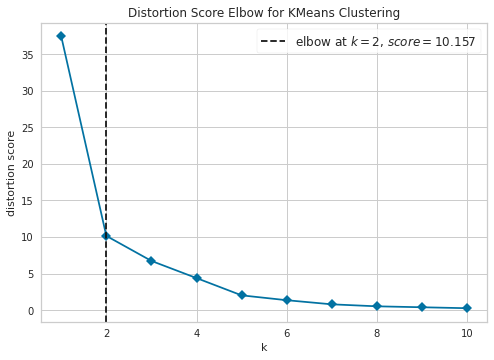

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:

# Import Library:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Elbow Method for K means
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(co_dist)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [24]:
from sklearn.decomposition import PCA
#Transform the data
pca = PCA()
transform = pca.fit_transform(co_dist)
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
data={'Name':df['COMPANY'],'Cluster':label}
elbow_result=pd.DataFrame(data)
elbow_result

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,0
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,0
4,DAIICHI SANKYO CO LTD,0
5,DAINIPPON SUMITOMO,0
6,DAITO PHARMA,0
7,EIKEN CHEMICAL CO LTD,1
8,EISAI CO LTD,0
9,FUJI PHARMA,0


  ## <a id='3.2'> 3.2)  </a> K-MEAN CLUSTER: SIHOUETTE METHOD:

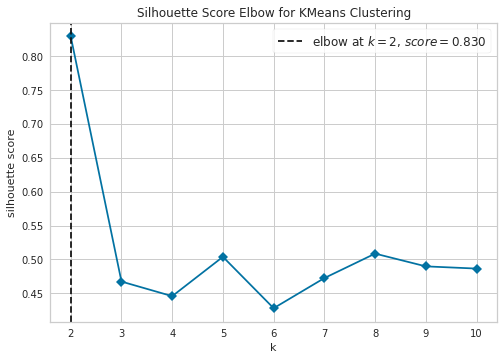

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [25]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,11),metric='silhouette', timings= False)
visualizer.fit(co_dist)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

  ## <a id='3.3'> 3.3) </a> AGGLOMERATIVE HIERARCHICAL CLUSTERING ALGORITHM:

In agglomerative clustering, the cluster formation starts with individual points. Each point is considered as one cluster.

Let’s say there are N data points. In the beginning, there will be N clusters.

Then, the distance between each pair of cluster is found and the clusters closest to each other is matched and made as one cluster. This would result in (N – 1) cluster.

In the next step, the distance between pair of clusters are found and the clusters closest to each other is matched and made as one cluster.

This would result in (N – 2) clusters. The same process is repeated until all the data points are merged into one cluster. e.g., root cluster.



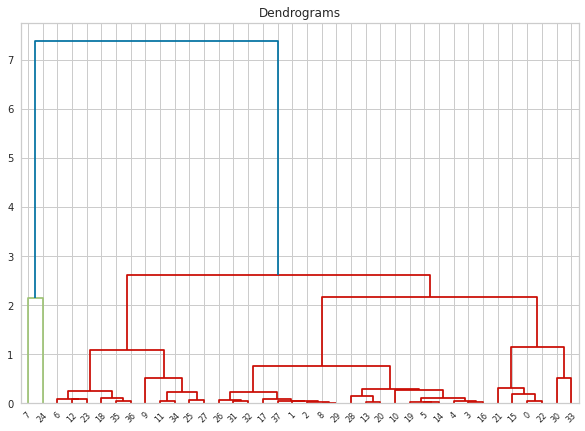

In [26]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(co_dist, method='ward'))


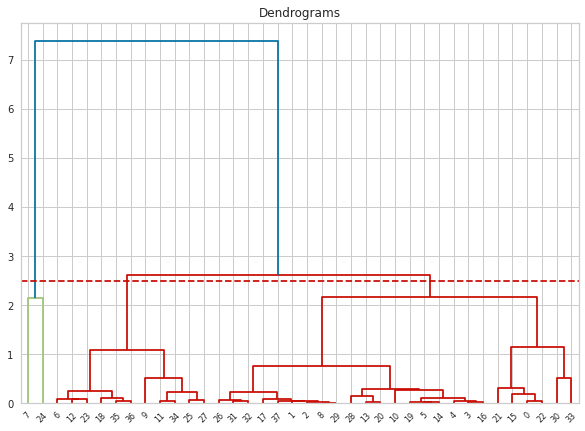

In [27]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(co_dist, method='ward'))
plt.axhline(y=2.5, color='r', linestyle='--')

## * k= 3

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 3 , affinity='euclidean', linkage='ward')  
label= cluster.fit_predict(co_dist)

data={'Name':df['COMPANY'],'Cluster':label}
Agg_result3=pd.DataFrame(data)
Agg_result3

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,0
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,0
4,DAIICHI SANKYO CO LTD,0
5,DAINIPPON SUMITOMO,0
6,DAITO PHARMA,2
7,EIKEN CHEMICAL CO LTD,1
8,EISAI CO LTD,0
9,FUJI PHARMA,2


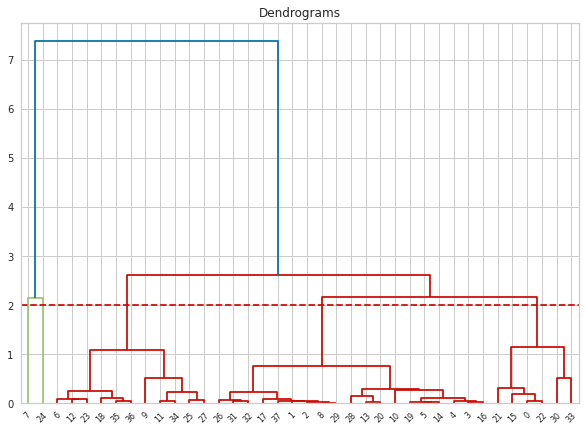

In [29]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(co_dist, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

## * k=5

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters= 5 , affinity='euclidean', linkage='ward')  
label= cluster.fit_predict(co_dist)

data={'Name':df['COMPANY'],'Cluster':label}
Agg_result5=pd.DataFrame(data)
Agg_result5

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,1
2,BIOFERMIN PHARMA,1
3,CHUGAI PHARMA,1
4,DAIICHI SANKYO CO LTD,1
5,DAINIPPON SUMITOMO,1
6,DAITO PHARMA,2
7,EIKEN CHEMICAL CO LTD,4
8,EISAI CO LTD,1
9,FUJI PHARMA,2


  ## <a id='3.4'> 3.4) </a> COMPANY GROUPING SUMMAY:

In [31]:
df1_style = elbow_result.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Ebow_result")
df2_style = Agg_result5.style.set_table_attributes("style='display:inline'").set_caption("Agg_result5")
df3_style = Agg_result3.style.set_table_attributes("style='display:inline'").set_caption("Agg_result3")
display_html(df1_style._repr_html_() + df2_style._repr_html_() + df3_style._repr_html_(), raw=True)

,Name,Cluster
0,ASKA PHARMA HOLDINGS,0
1,ASTELLAS PHARMA INC,0
2,BIOFERMIN PHARMA,0
3,CHUGAI PHARMA,0
4,DAIICHI SANKYO CO LTD,0
5,DAINIPPON SUMITOMO,0
6,DAITO PHARMA,0
7,EIKEN CHEMICAL CO LTD,1
8,EISAI CO LTD,0
9,FUJI PHARMA,0
